# EDA

General Outline of EDA
The code template shall perform the following steps:
1. Preview data
2. Check total number of entries and column types
3. Check any null values
4. Check duplicate entries
5. Plot distribution of numeric data (univariate and pairwise joint distribution)
6. Analyse time series of numeric data by daily, monthly and yearly frequencies

 https://towardsdatascience.com/exploratory-data-analysis-eda-a-practical-guide-and-template-for-structured-data-abfbf3ee3bd9
 

Exploratory Data Analysis does two main things:
1. It helps clean up a dataset.
2. It gives you a better understanding of the variables and the relationships between them.

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
warnings.simplefilter('ignore')
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline
import missingno

In [2]:
# building = pd.read_csv('../input/ashrae-energy-prediction/building_metadata.csv')
# weather_train = pd.read_csv('../input/ashrae-energy-prediction/weather_train.csv')
# weather_test = pd.read_csv('../input/ashrae-energy-prediction/weather_test.csv')
# train = pd.read_csv('../input/ashrae-energy-prediction/train.csv')
# test = pd.read_csv('../input/ashrae-energy-prediction/test.csv')

In [103]:
pwd()

'/Users/samwise/Downloads'

# Read in files and concatenate them all with filename in column

In [321]:
import pandas as pd
import glob, os

#files = glob.glob('/Users/samwise/Downloads/Task1_Scripts/kW Data/Portal_Cleaned/DC_pre_12_months/*.csv') # DC portal cleaned data
files = glob.glob('/Users/samwise/Downloads/Task1_Scripts/kW Data/Unprocessed/dc_data/*.csv')# DC unprocessed data
#files = glob.glob('/Users/samwise/Downloads/Task1_Scripts/kW Data/Unprocessed/*.csv')# FC unprocessed data
#files = glob.glob(r'/Users/samwise/Downloads/Task1_Scripts/kW Data/seattle city light/*.csv') # Seattle
#files = glob.glob(r'/Users/samwise/Downloads/Task1_Scripts/kW Data/vermont/Vermont_all.csv') # Vermont
#files = glob.glob(r'/Users/samwise/Downloads/Task1_Scripts/kW Data/Portal_Cleaned/FC_pre_12_months/*.csv') # FC
df = pd.concat([pd.read_csv(fp,skiprows=2).assign(Meterid=os.path.basename(fp)) for fp in files]) # For vermont and seattle and DC
#df = pd.concat([pd.read_csv(fp).assign(Meterid=os.path.basename(fp)) for fp in files])
#df=pd.read_csv('/Users/samwise/Downloads/Task1_Scripts/kW Data/vermont/Vermont_all.csv') Use this line to read all the Vermont Data

In [332]:
df = df.assign(id=(df['Meterid']).astype('category').cat.codes)  # Assign unique ID to each meter id

In [201]:
df.columns = ['time', 'eload','Temp','Meterid','id']  # Vermont 

In [272]:
df.columns = ['Meterid','Temp', 'time','eload','NaN','id']  # Seattle

In [323]:
df.columns = ['time', 'eload','Temp','Meterid']  # DC

In [ ]:
df.drop(columns=['NaN'])  # Seattle drop NaN column

In [333]:
df

time  eload  Temp    Meterid   id
0     2013-02-01 00:15:00  53.22  33.1  DC_47.csv  343
1     2013-02-01 00:30:00  53.04  33.1  DC_47.csv  343
2     2013-02-01 00:45:00  53.01  33.1  DC_47.csv  343
3     2013-02-01 01:00:00  52.50  32.0  DC_47.csv  343
4     2013-02-01 01:15:00  52.49  32.0  DC_47.csv  343
...                   ...    ...   ...        ...  ...
70171 2015-02-01 23:00:00   0.65  30.0  DC_62.csv  455
70172 2015-02-01 23:15:00   0.65  30.0  DC_62.csv  455
70173 2015-02-01 23:30:00   0.65  30.0  DC_62.csv  455
70174 2015-02-01 23:45:00   0.65  30.0  DC_62.csv  455
70175 2015-02-02 00:00:00   0.65  30.0  DC_62.csv  455

[35088000 rows x 5 columns]

In [325]:
df.Meterid.nunique()  # Number of unique meters in the dataset

500

In [ ]:
# Delete first two rows
# Delete  floorarea, type, type, 

In [327]:
df["time"] = pd.to_datetime(df["time"],  errors='coerce') # Convert time column to the datetime format

In [127]:
df["eload"]=pd.to_numeric(df["eload"])

In [330]:
df.dtypes

time       datetime64[ns]
eload             float64
Temp              float64
Meterid            object
dtype: object

## Glimpse of the data

In [8]:
print('Size of train_df data', df.shape)

Size of train_df data (1184001, 5)


In [9]:
df['id'] = df['id'].astype(float) # Convert id column to float

In [59]:
df['id'].nunique()  # Check to see how many meter id's we are dealing with

168

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1184001 entries, 0 to 8642
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   time     1183823 non-null  datetime64[ns]
 1   eload    1183823 non-null  float64       
 2   Temp     1183823 non-null  float64       
 3   Meterid  1184001 non-null  object        
 4   id       1184001 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 49.7+ MB


time   eload  Temp                   Meterid   id
0 2013-02-02 00:00:00  145.34  21.0  12_T_DC_1 - Copy (2).csv  0.0
1 2013-02-02 01:00:00  145.14  21.0  12_T_DC_1 - Copy (2).csv  0.0
2 2013-02-02 02:00:00  143.73  19.9  12_T_DC_1 - Copy (2).csv  0.0
3 2013-02-02 03:00:00  143.48  19.9  12_T_DC_1 - Copy (2).csv  0.0
4 2013-02-02 04:00:00  142.35  19.0  12_T_DC_1 - Copy (2).csv  0.0

In [12]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8633, 8634, 8635, 8636, 8637, 8638, 8639, 8640, 8641, 8642],
           dtype='int64', length=1184001)

In [13]:
df.index_col=['id']

In [120]:
df.head()

time   eload                Temp     Meterid  id
3 2013-11-12 10:15:00   2.577  23.899999999999999  VT_900.csv   5
4 2013-11-12 10:30:00  2.8875  24.100000000000001  VT_900.csv   5
5 2013-11-12 10:45:00   3.564  23.899999999999999  VT_900.csv   5
6 2013-11-12 11:00:00  4.0485  24.300000000000001  VT_900.csv   5
7 2013-11-12 11:15:00  3.3435  24.800000000000001  VT_900.csv   5

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470542 entries, 3 to 49683
Data columns (total 5 columns):
time       470528 non-null datetime64[ns]
eload      470542 non-null object
Temp       470542 non-null object
Meterid    470542 non-null object
id         470542 non-null int8
dtypes: datetime64[ns](1), int8(1), object(3)
memory usage: 28.4+ MB


In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if len(df[df.isnull().any(axis=1)] != 0):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of n

Preview of data:


time   eload  Temp  Meterid  id
0 2013-02-01 02:15:00  0.3930  29.5      885   0
1 2013-02-01 02:30:00  0.3465  29.9      885   0
2 2013-02-01 02:45:00  0.3135  29.9      885   0


To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470529 entries, 0 to 470528
Data columns (total 5 columns):
time       470529 non-null datetime64[ns]
eload      470529 non-null float64
Temp       470529 non-null float64
Meterid    470529 non-null int64
id         470529 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 17.9 MB
None

No duplicated entries found

To check: 
Unique count of non-numeric data

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[470529 rows x 0 columns]

To check: 
Distribut

count        mean        std    min      25%      50%      75%  \
eload    470529.0    3.326882   5.633873    0.0    0.429    1.416    3.612   
Temp     470529.0   41.350804  21.389305  -19.3   26.600   41.700   59.300   
Meterid  470529.0  890.965065   6.445743  885.0  886.000  888.000  901.000   
id       470529.0    3.374959   2.384712    0.0    1.000    3.000    6.000   

             max  
eload     41.055  
Temp      91.100  
Meterid  902.000  
id         7.000

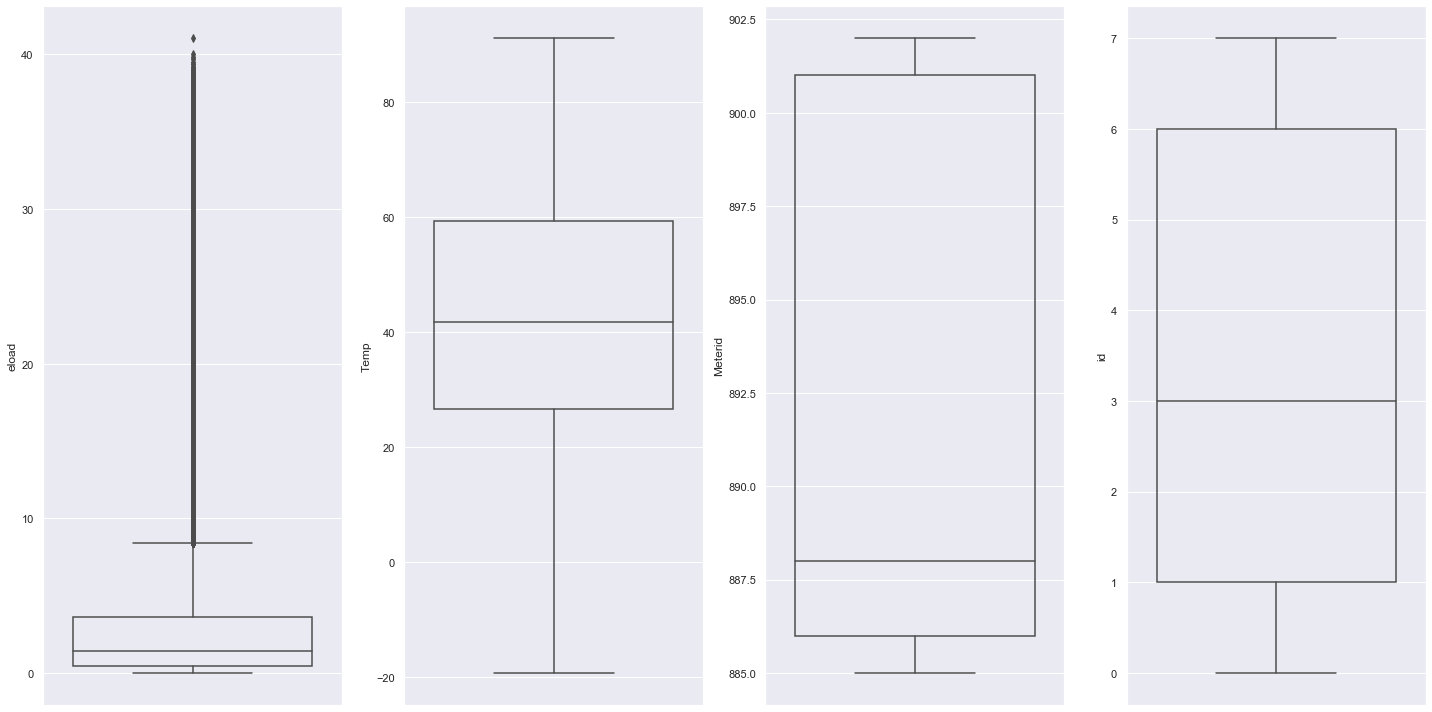


To check pairwise joint distribution of numeric data


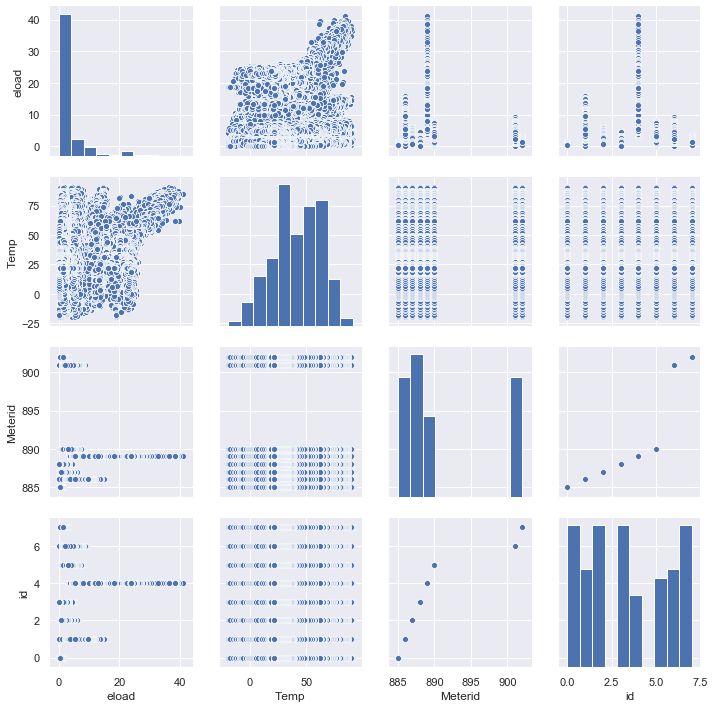

In [192]:
eda(df)

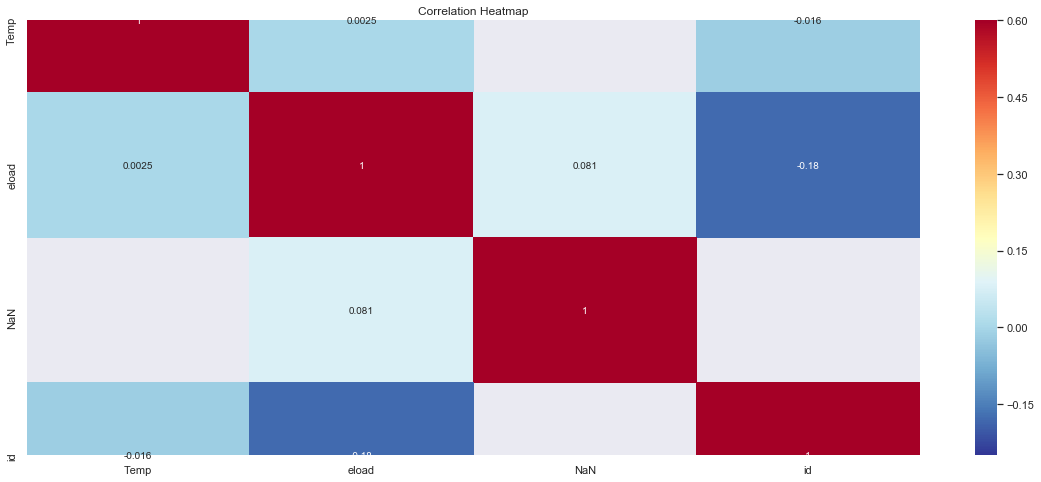

In [277]:
corr=df.corr()
plt.figure(figsize = (20, 8))

# Heatmap of correlations
sns.heatmap(corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

.00-.19 “very weak”
.20-.39 “weak”
.40-.59 “moderate”
.60-.79 “strong”
.80-1.0 “very strong”

## Mean Meter Reading by Hour and Day for entire dataset

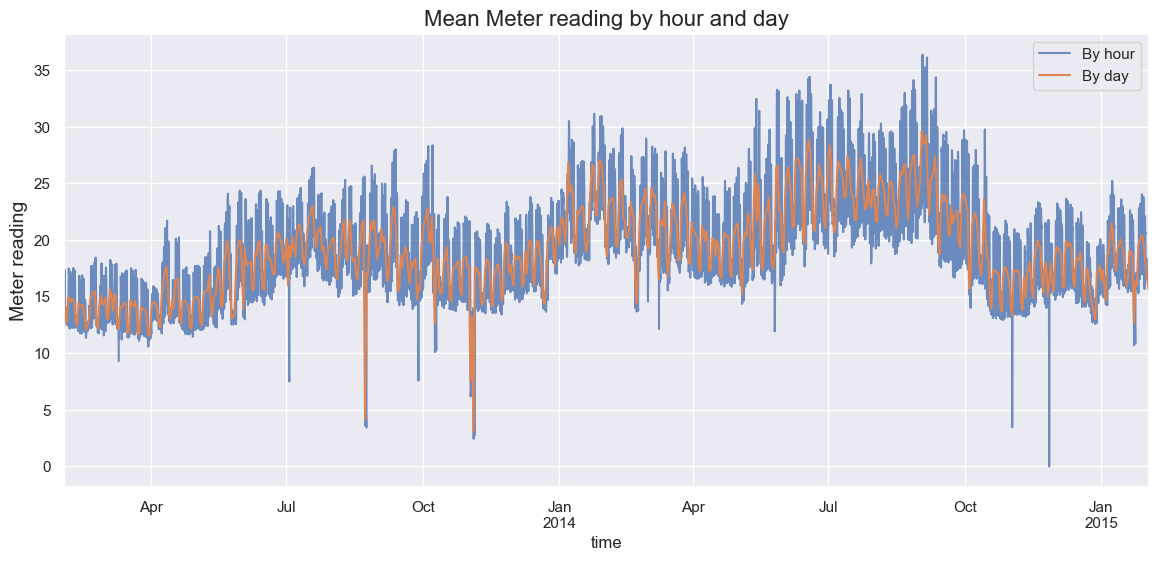

In [205]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6), dpi=100)
df[['time', 'eload']].set_index('time').resample('H').mean()['eload'].plot(ax=axes, label='By hour', alpha=0.8).set_ylabel('Meter reading', fontsize=14);
df[['time', 'eload']].set_index('time').resample('D').mean()['eload'].plot(ax=axes, label='By day', alpha=1).set_ylabel('Meter reading', fontsize=14);
axes.set_title('Mean Meter reading by hour and day', fontsize=16);
axes.legend();

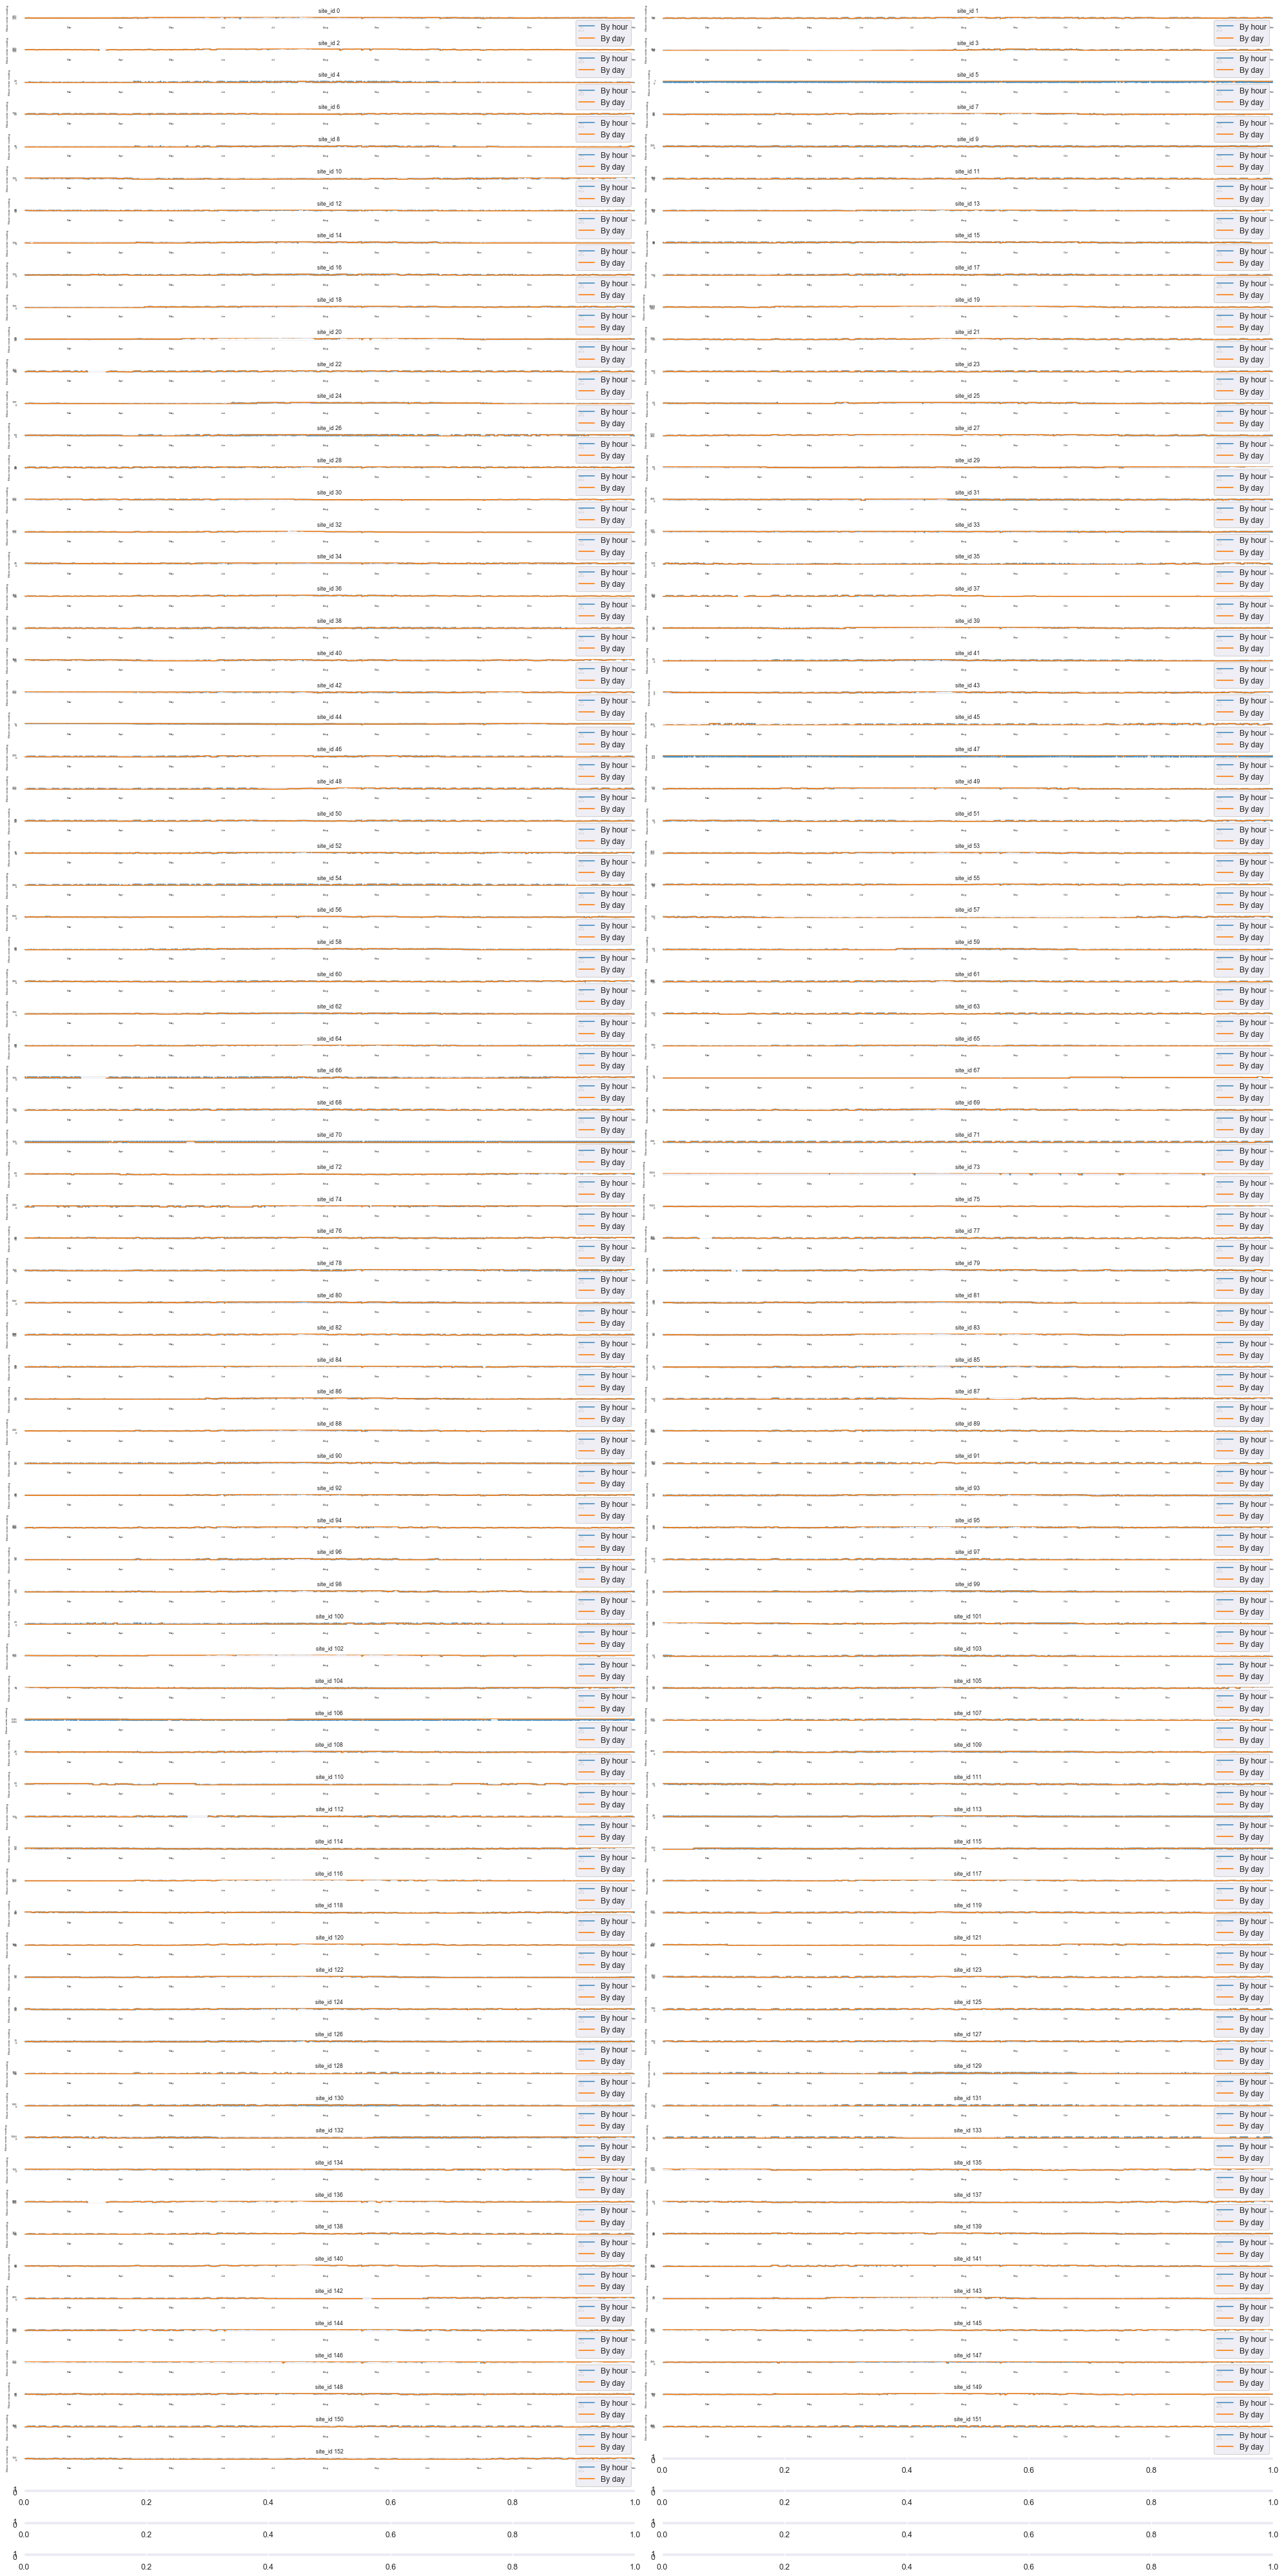

In [40]:
fig, axes = plt.subplots(80,2,figsize=(25,50), dpi=80)
for i in range(df['id'].nunique()):
#for i in range(1):
    df[df['id'] == i][['time', 'eload']].set_index('time').resample('H').mean()['eload'].plot(ax=axes[i//2][i%2],label='By hour', alpha=0.8, color='tab:blue',fontsize=4).set_ylabel('Mean meter reading', fontsize=4);
    df[df['id'] == i][['time', 'eload']].set_index('time').resample('D').mean()['eload'].plot(ax=axes[i//2][i%2],label='By day', alpha=1, color='tab:orange',fontsize=4).set_xlabel('');
    axes[i//2][i%2].legend();
    axes[i//2][i%2].set_title('site_id {}'.format(i), fontsize=8);
    plt.subplots_adjust(hspace=0.45)
    plt.tight_layout()

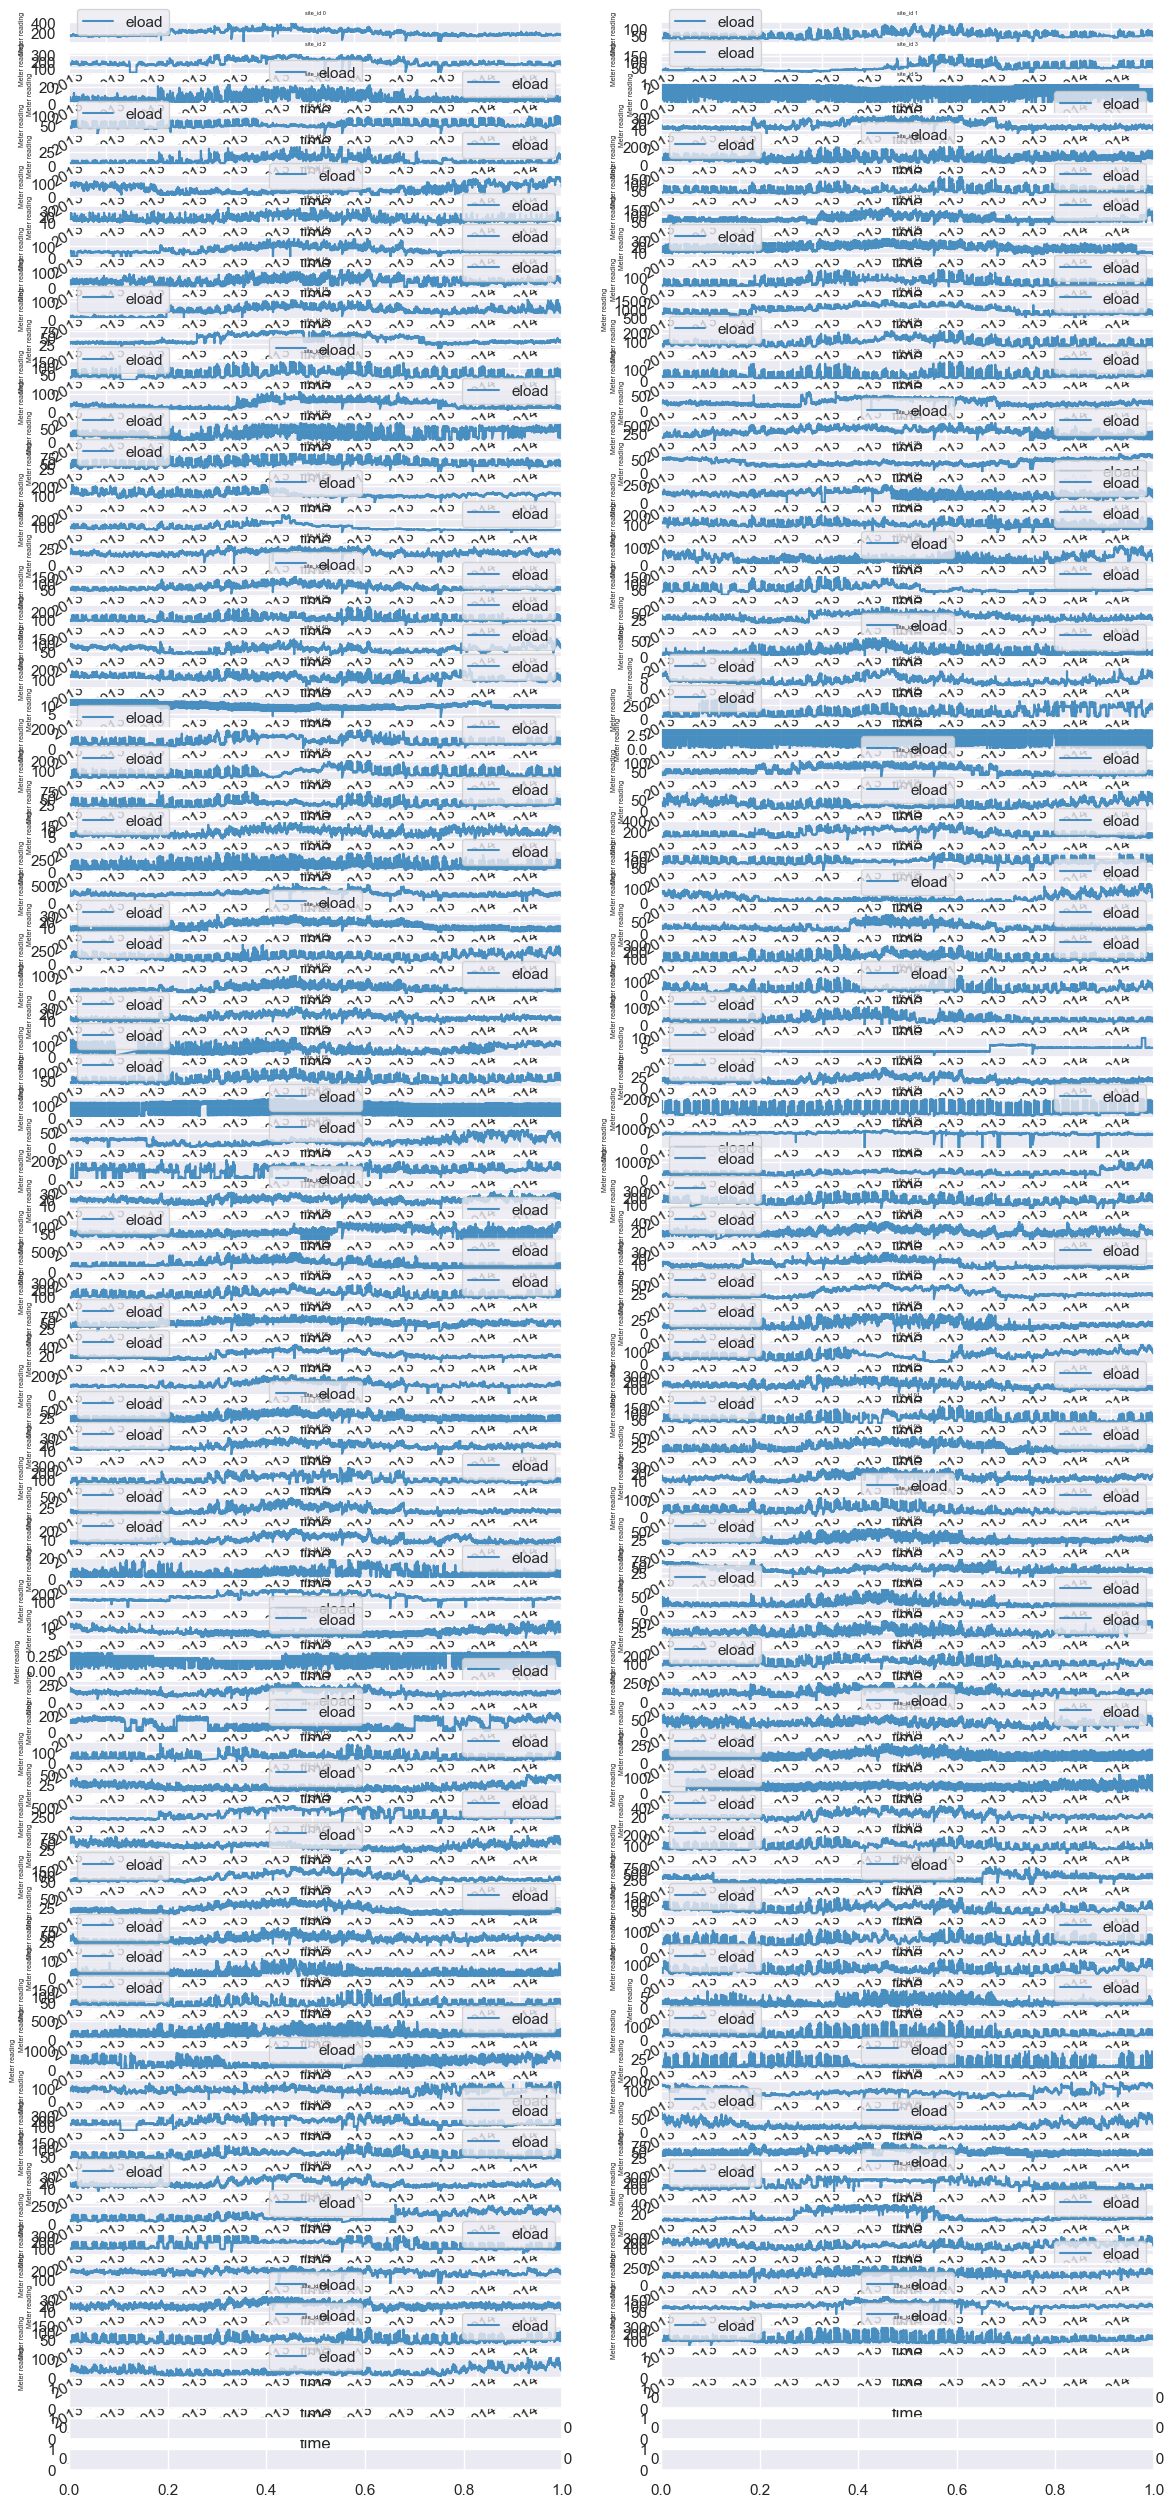

In [24]:
fig, axes = plt.subplots(80,2,figsize=(14,36), dpi=100)
for i in range(df['id'].nunique()):
    df[df['id'] == i][['time', 'eload']].set_index('time').plot(ax=axes[i//2][i%2], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Meter reading', fontsize=5);
    #df[df['id'] == i][['time', 'temp']].set_index('temp').plot(ax=axes[i%8][i//8], alpha=1, label='By day', color='tab:orange').set_xlabel('');
    axes[i//2][i%2].legend();
    axes[i//2][i%2].set_title('site_id {}'.format(i), fontsize=4);
    plt.subplots_adjust(hspace=0.45)

In [ ]:
# CBECS COMMERCIAL BUILDING STANDARD ABOUT ~18KWH PER SQFT PER YEAR, 100K OFFICE SQFT BLDG
# CUT OFF ANYTHING BELOW 10KWH

# Histogram that lines up the annual consumption for each building ( Average daily consumption*365)
# Highest first


# CLean up with less plots per row

# Run for each data source we did for peak prediction


# Picking real peaks!

# EDA

In [ ]:
# https://www.kaggle.com/caesarlupum/ashrae-start-here-a-gentle-introduction

##### Examine the Distribution of the Target Column

### Visualize Missing Data and Zeroes

In [ ]:
df1=df

In [ ]:
train = df.set_index(['time'])

In [ ]:
train = train.fillna(0)   #Shayan

In [ ]:
train.info()

In [ ]:
train.eload=train.eload.astype(int)
train.Temp=train.Temp.astype(int)

In [ ]:
df1["time"] = pd.to_datetime(df1["time"]) # Convert time column to the datetime format

In [ ]:
train.head(5)

In [ ]:
df1.head(5)

### Examine Missing Values
Number and percentage of missing values in each column

In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing__train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing__train_data.head(4)

### Plotting

In [196]:
df.Meterid.nunique()  # Number of unique meters in the dataset

651

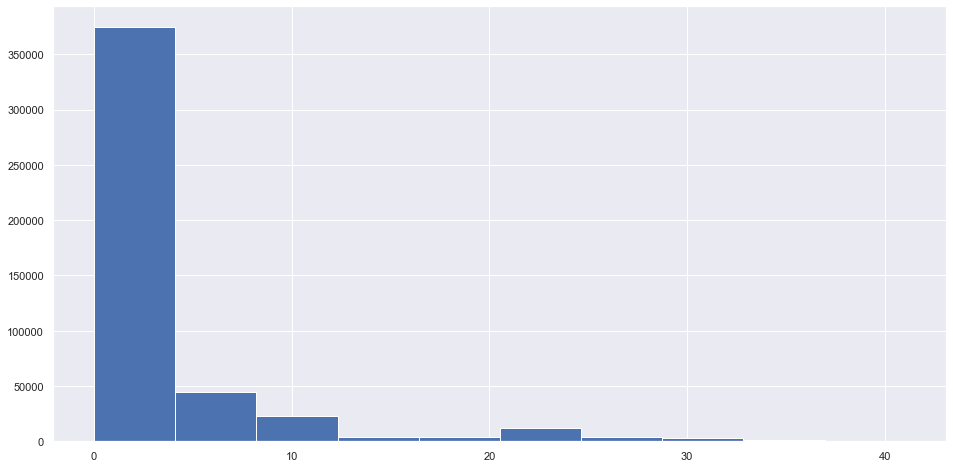

In [155]:
df['eload'].hist(figsize=(16, 8))

In [208]:
def plot_dist_col(column):
    '''plot dist curves for train and test weather data for the given column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(df[column].dropna(), color='green', ax=ax).set_title(column, fontsize=16)
    #sns.distplot(weather_test_df[column].dropna(), color='purple', ax=ax).set_title(column, fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.legend(['eload'])
    plt.show()

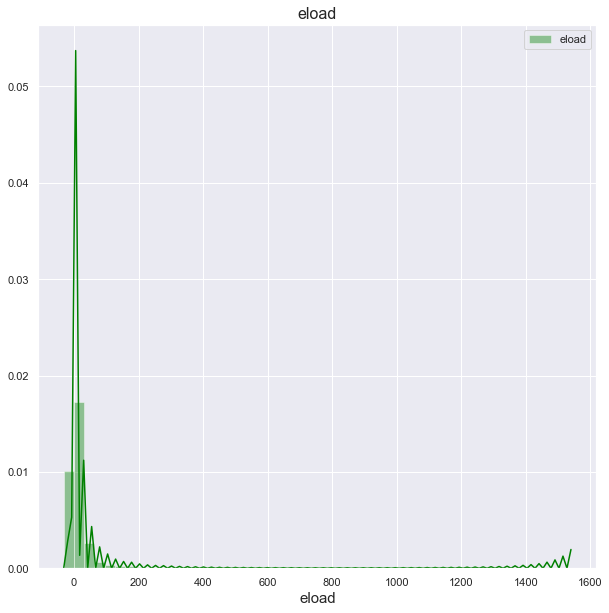

In [209]:
plot_dist_col('eload')

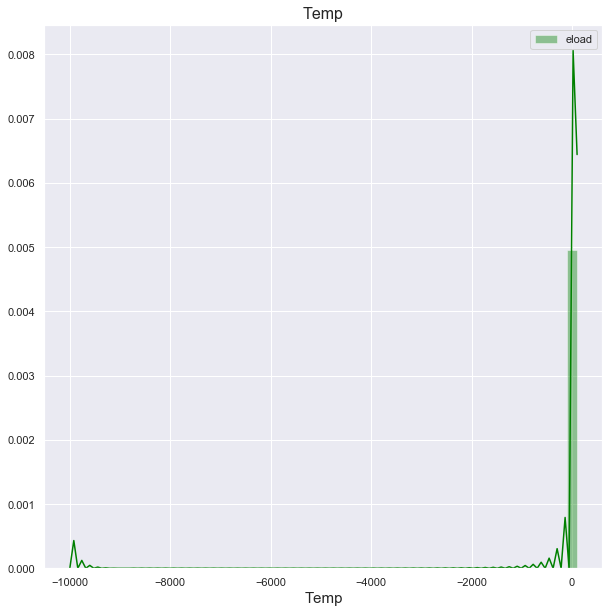

In [210]:
plot_dist_col('Temp')

### Simple Single Series Analysis

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
ts=df.groupby(["time"])["eload"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('meter_reading')
plt.xlabel('timestamp')
plt.ylabel('meter_reading')
plt.plot(ts);

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();

In [ ]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="multiplicative")
fig = res.plot()

In [ ]:
# Additive model
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="additive")
fig = res.plot()

## Mean E load< 10

In [334]:
total_ids = df['id'].nunique() #Get total numbers of ids
indiv_ids_list = [] #Blank list 
for i in range(total_ids):
    indiv_id = df.loc[df['id'] == float(i)] #Store an individual id
    indiv_id = indiv_id.fillna(0)
    if(indiv_id.eload.mean() < 10.0):
        #print(indiv_id.eload.mean())
        indiv_ids_list.append(indiv_id)
#Indiv_ids _lis

In [280]:
#indiv_ids_list

In [335]:
total_ids

500

In [336]:
len(indiv_ids_list)

299

In [350]:
me=df

In [289]:
me=me.drop(columns=['NaN'])

In [ ]:
# Convert Vermont to hourly

In [177]:
me=me.resample('H', on='time').eload.sum()

In [180]:
# aggregating multiple fields for each hour
#me.resample('H', on='eload').agg({'eload':'sum'})

In [338]:
me=me.groupby('id').mean().reset_index()

In [351]:
me=me.groupby('Meterid').mean().reset_index() # If you want to see which meters had mean eload bigger than 10

In [339]:
me

id      eload       Temp
0      0  47.769317  57.574859
1      1  14.720257  57.574859
2      2  47.569681  57.574859
3      3   1.009930  57.574859
4      4   0.582586  57.574859
..   ...        ...        ...
495  495  13.176988  57.574859
496  496  61.024563  57.574859
497  497  34.766160  57.574859
498  498  34.522702  57.574859
499  499   7.977604  57.574859

[500 rows x 3 columns]

In [352]:
me1=me.sort_values(by=['eload'])

In [341]:
me1

id       eload       Temp
268  268    0.000000  57.574859
323  323    0.000000  57.574859
446  446    0.000000  57.574859
368  368    0.000000  57.574859
339  339    0.000000  57.574859
..   ...         ...        ...
27    27  228.350907  57.574859
172  172  230.696069  57.574859
328  328  319.188846  57.574859
14    14  360.750043  57.574859
26    26  591.876839  57.574859

[500 rows x 3 columns]

In [294]:
me1["eload"] = 4 * me1["eload"] # Use this line when you have 15 min time interval data, not hourly data

In [344]:
me1

id       eload       Temp
268  268    0.000000  57.574859
323  323    0.000000  57.574859
446  446    0.000000  57.574859
368  368    0.000000  57.574859
339  339    0.000000  57.574859
..   ...         ...        ...
27    27  228.350907  57.574859
172  172  230.696069  57.574859
328  328  319.188846  57.574859
14    14  360.750043  57.574859
26    26  591.876839  57.574859

[500 rows x 3 columns]

In [230]:
total_ids = me1['id'].nunique() #Get total numbers of ids
total_ids

500

In [348]:
pd.set_option('display.max_rows', None)  # Display all results of a dataframe

In [354]:
print(me1)

        Meterid     eload       Temp   id
268  DC_367.csv  0.000000  57.574859  268
323  DC_446.csv  0.000000  57.574859  323
446  DC_605.csv  0.000000  57.574859  446
368  DC_500.csv  0.000000  57.574859  368
339  DC_465.csv  0.000000  57.574859  339
377  DC_515.csv  0.000000  57.574859  377
378  DC_516.csv  0.000000  57.574859  378
346  DC_475.csv  0.000000  57.574859  346
87   DC_179.csv  0.000000  57.574859   87
383  DC_522.csv  0.000000  57.574859  383
348  DC_477.csv  0.000000  57.574859  348
311  DC_428.csv  0.000000  57.574859  311
454  DC_618.csv  0.000000  57.574859  454
389  DC_529.csv  0.000000  57.574859  389
247  DC_342.csv  0.000000  57.574859  247
400  DC_544.csv  0.000000  57.574859  400
375  DC_509.csv  0.000156  57.574859  375
406  DC_552.csv  0.000302  57.574859  406
142  DC_228.csv  0.001695  57.574859  142
445  DC_604.csv  0.003933  57.574859  445
484   DC_85.csv  0.004244  57.574859  484
322  DC_444.csv  0.005965  57.574859  322
298  DC_407.csv  0.007107  57.5748

In [353]:
me1=me1[(me1['eload']<10.0)]

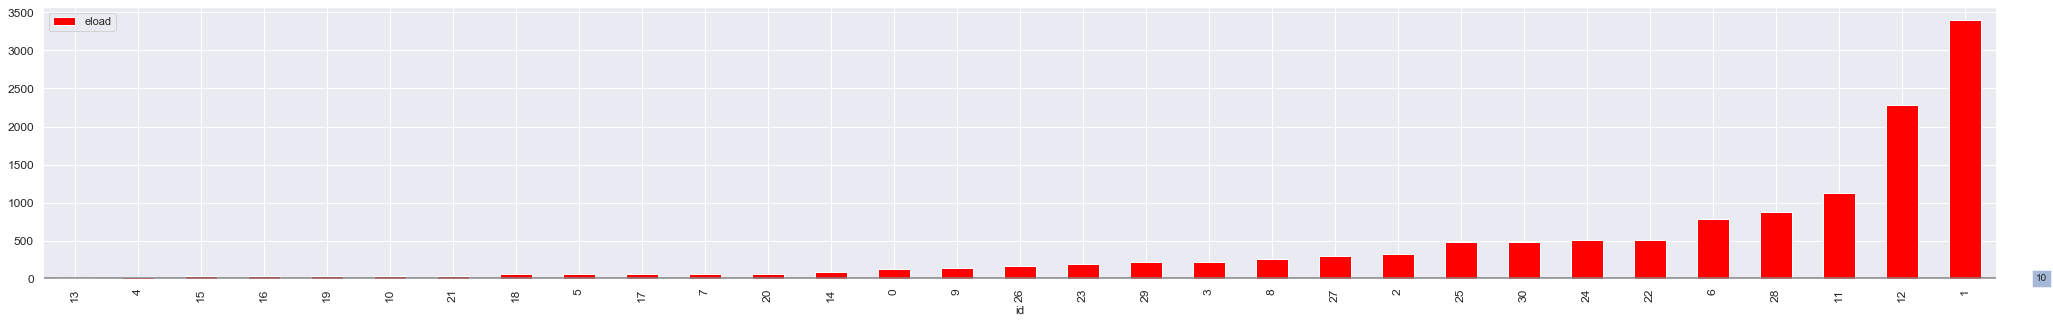

In [297]:
### Seattle
ax = me1.plot.bar(x='id', y='eload',color="red", rot=90,figsize=(35,5),fontsize="12")

ax.axhline(10, color="gray")
ax.text(1.02, 10, "10", va='center', ha="left", bbox=dict(facecolor="b",alpha=0.5),
        transform=ax.get_yaxis_transform())
plt.show()


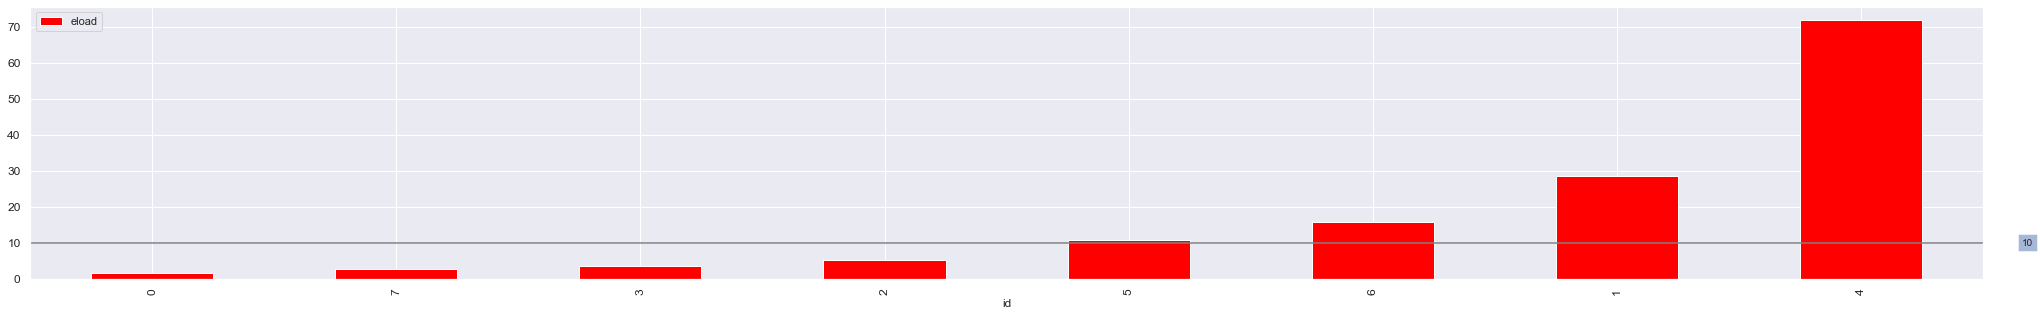

In [190]:
### Vermont
ax = me1.plot.bar(x='id', y='eload',color="red", rot=90,figsize=(35,5),fontsize="12")

ax.axhline(10, color="gray")
ax.text(1.02, 10, "10", va='center', ha="left", bbox=dict(facecolor="b",alpha=0.5),
        transform=ax.get_yaxis_transform())
plt.show()


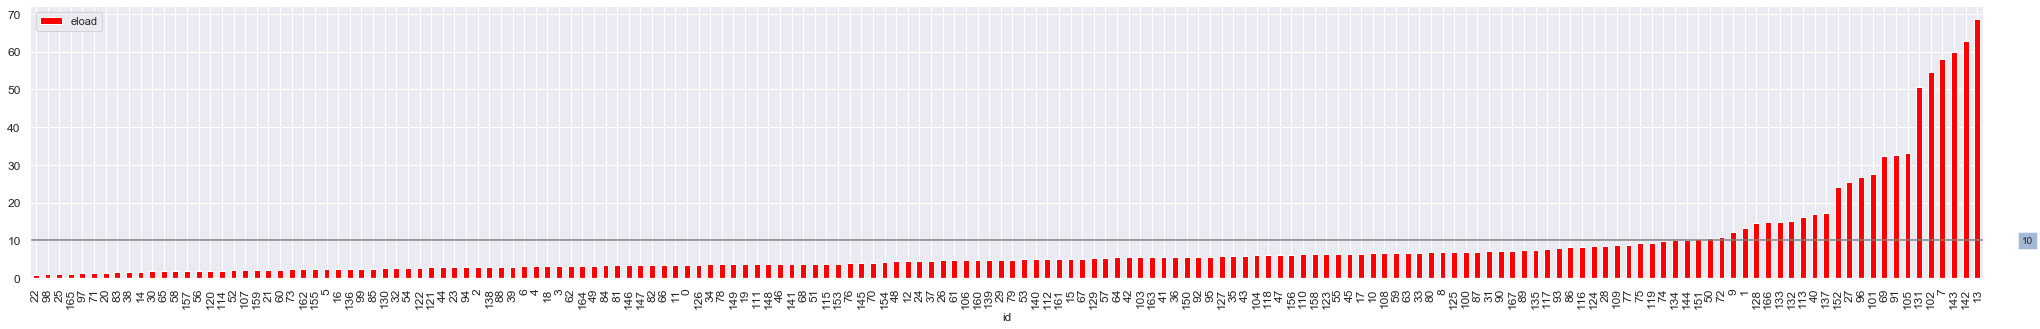

In [68]:
### FC
ax = me1.plot.bar(x='id', y='eload',color="red", rot=90,figsize=(35,5),fontsize="12")

ax.axhline(10, color="gray")
ax.text(1.02, 10, "10", va='center', ha="left", bbox=dict(facecolor="b",alpha=0.5),
        transform=ax.get_yaxis_transform())
plt.show()


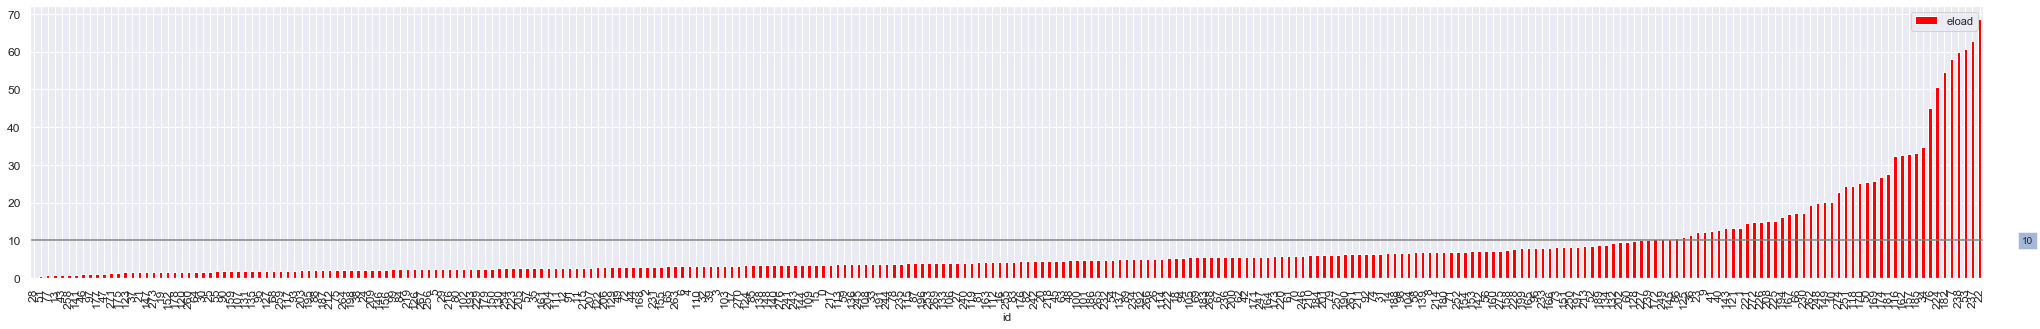

In [263]:
### FC Unprocessed
ax = me1.plot.bar(x='id', y='eload',color="red", rot=90,figsize=(35,5),fontsize="12")

ax.axhline(10, color="gray")
ax.text(1.02, 10, "10", va='center', ha="left", bbox=dict(facecolor="b",alpha=0.5),
        transform=ax.get_yaxis_transform())
plt.show()


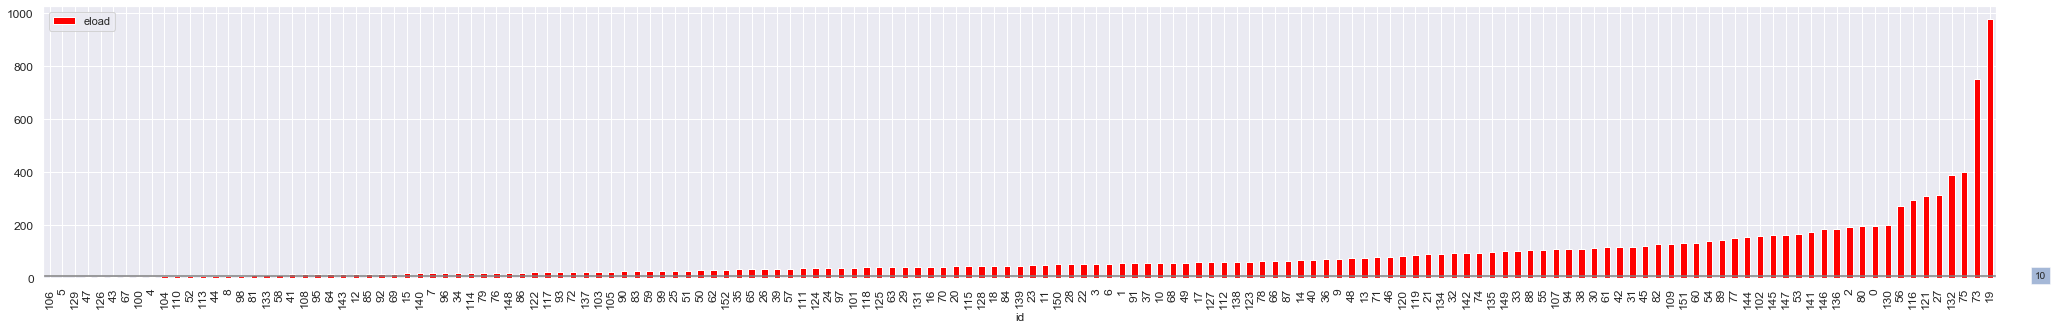

In [55]:
### DC
ax = me1.plot.bar(x='id', y='eload',color="red", rot=90,figsize=(35,5),fontsize="12")

ax.axhline(10, color="gray")
ax.text(1.02, 10, "10", va='center', ha="left", bbox=dict(facecolor="b",alpha=0.5),
        transform=ax.get_yaxis_transform())
plt.show()

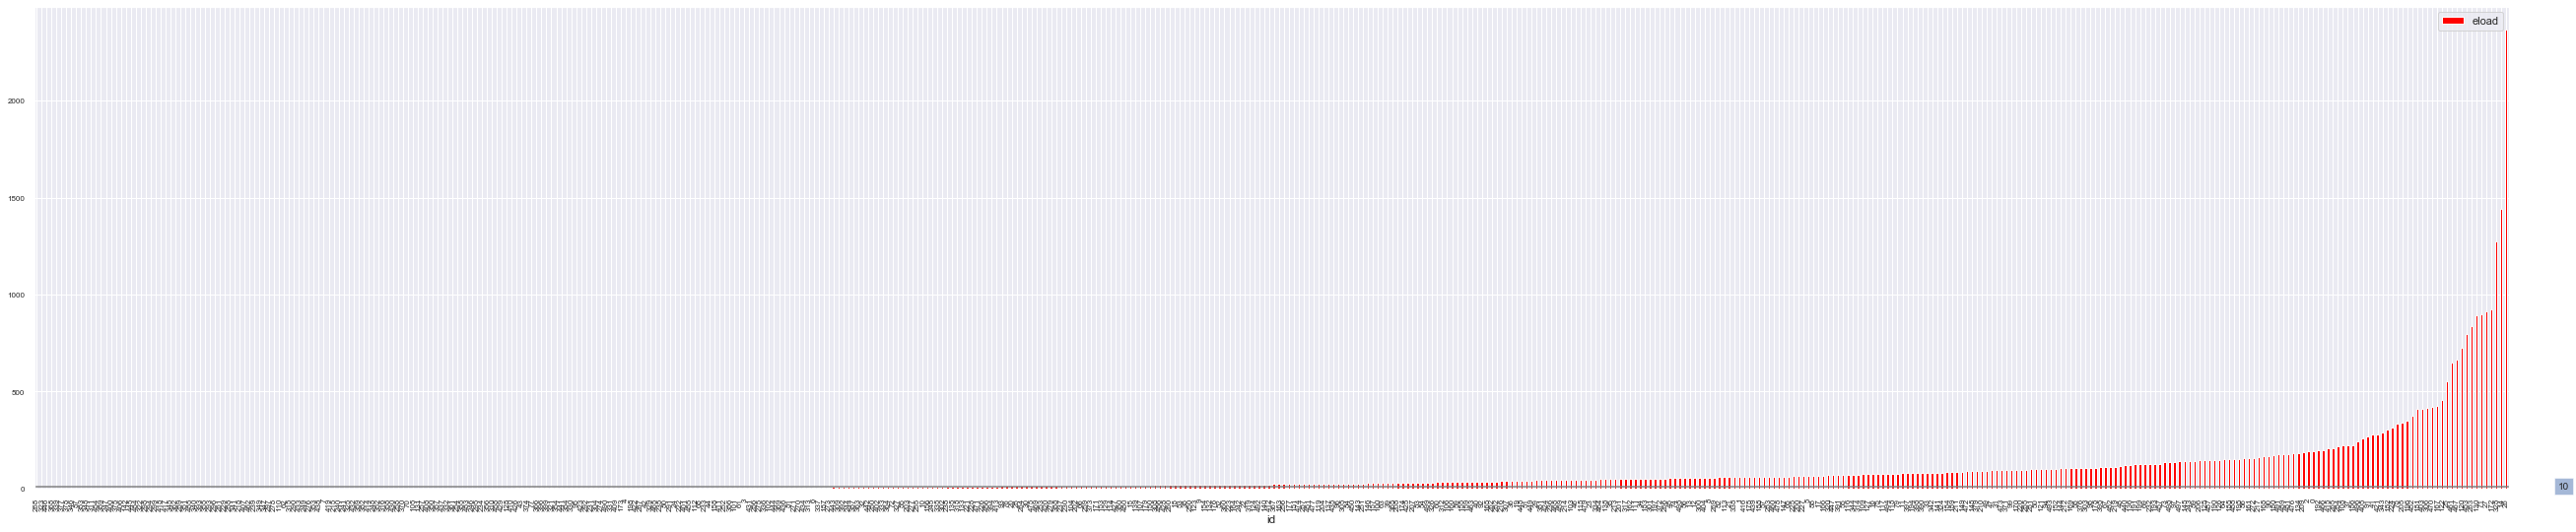

In [243]:
### DC Unprocessed
ax = me1.plot.bar(x='id', y='eload',color="red", rot=90,figsize=(45,9),fontsize="8")

ax.axhline(10, color="gray")
ax.text(1.02, 10, "10", va='center', ha="left", bbox=dict(facecolor="b",alpha=0.5),
        transform=ax.get_yaxis_transform())
plt.show()

# Fort Collins Data

In [6]:
import pandas as pd
import glob, os

#files = glob.glob('/Users/samwise/Downloads/Task1_Scripts/kW Data/Portal_Cleaned/DC_pre_12_months/*.csv')
files = glob.glob(r'/Users/samwise/Downloads/Task1_Scripts/kW Data/Portal_Cleaned/FC_pre_12_months/*.csv')
fc = pd.concat([pd.read_csv(fp).assign(Meterid=os.path.basename(fp)) for fp in files])

In [7]:
fc = fc.assign(id=(fc['Meterid']).astype('category').cat.codes)  # Assign unique ID to each meter id

In [8]:
fc["time"] = pd.to_datetime(fc["time"]) # Convert time column to the datetime format

In [9]:
fc.dtypes

time       datetime64[ns]
eload             float64
Temp              float64
Meterid            object
id                  int16
dtype: object

In [10]:
fc['id'].nunique()  # Check to see how many meter id's we are dealing with

168

In [11]:
fc.info()
fc.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465489 entries, 0 to 8723
Data columns (total 5 columns):
time       1465489 non-null datetime64[ns]
eload      1465489 non-null float64
Temp       1465489 non-null float64
Meterid    1465489 non-null object
id         1465489 non-null int16
dtypes: datetime64[ns](1), float64(2), int16(1), object(1)
memory usage: 58.7+ MB


time  eload   Temp             Meterid  id
0 2015-01-01 08:00:00  3.297   3.07  subDf_414_2015.csv  64
1 2015-01-01 09:00:00  3.125   8.18  subDf_414_2015.csv  64
2 2015-01-01 10:00:00  3.131  14.13  subDf_414_2015.csv  64
3 2015-01-01 11:00:00  2.891  18.85  subDf_414_2015.csv  64
4 2015-01-01 12:00:00  3.013  20.77  subDf_414_2015.csv  64

In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if len(df[df.isnull().any(axis=1)] != 0):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of n

Preview of data:


time  eload   Temp             Meterid  id
0 2015-01-01 08:00:00  3.297   3.07  subDf_414_2015.csv  64
1 2015-01-01 09:00:00  3.125   8.18  subDf_414_2015.csv  64
2 2015-01-01 10:00:00  3.131  14.13  subDf_414_2015.csv  64


To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465489 entries, 0 to 8723
Data columns (total 5 columns):
time       1465489 non-null datetime64[ns]
eload      1465489 non-null float64
Temp       1465489 non-null float64
Meterid    1465489 non-null object
id         1465489 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 67.1+ MB
None

No duplicated entries found

To check: 
Unique count of non-numeric data

Meterid    168
dtype: int64
Top 5 unique values of Meterid
               Meterid  Count
0   subDf_484_2015.csv   8746
1   subDf_374_2015.csv   8728
2   subDf_247_2015.csv   8724
3  subDf_1039_2015.csv   8724
4   subDf_206_2015.csv   8724
 

To check: 
Distribution of numeric data


count       mean        std   min     25%     50%      75%     max
eload  1465489.0   8.187991  12.523374  0.00   2.434   4.337    7.928  186.78
Temp   1465489.0  48.677020  18.877795 -1.18  34.920  49.150   62.070   91.97
id     1465489.0  83.498562  48.497676  0.00  41.000  83.000  126.000  167.00

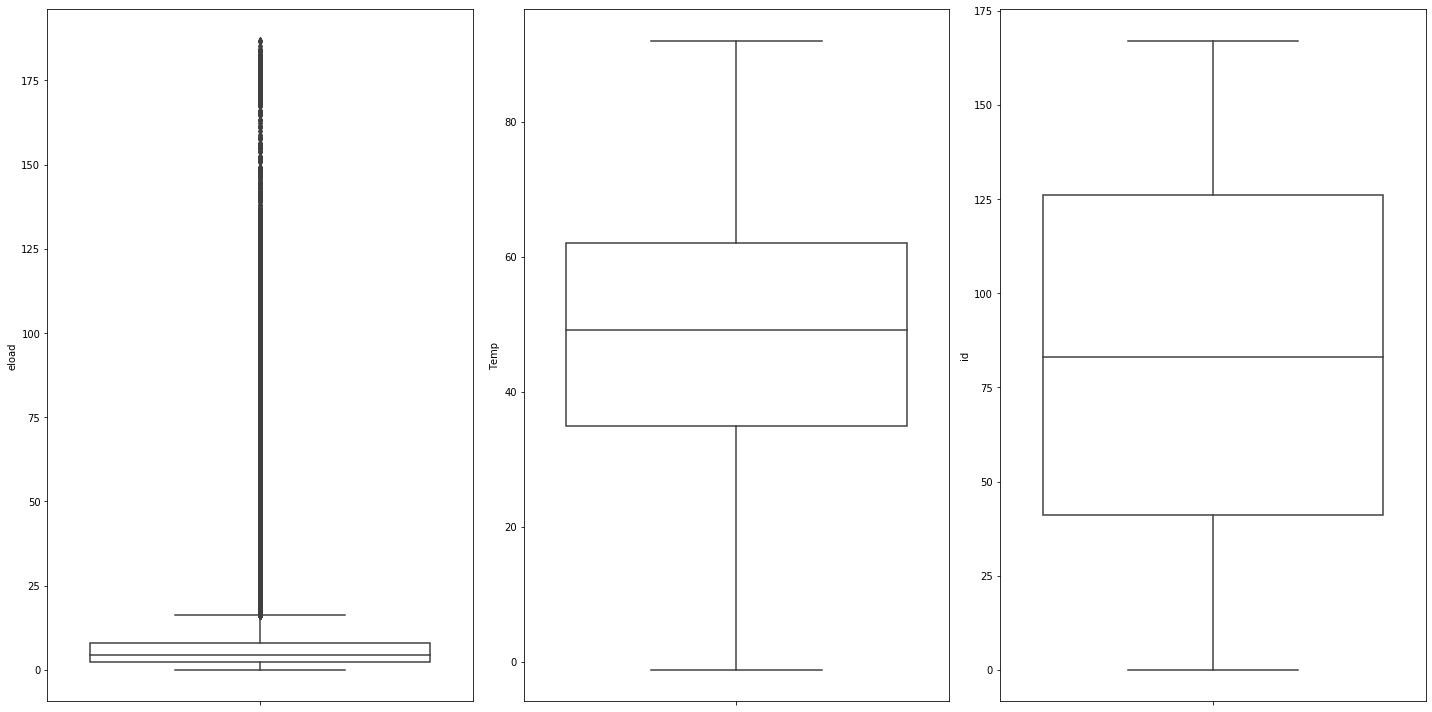


To check pairwise joint distribution of numeric data


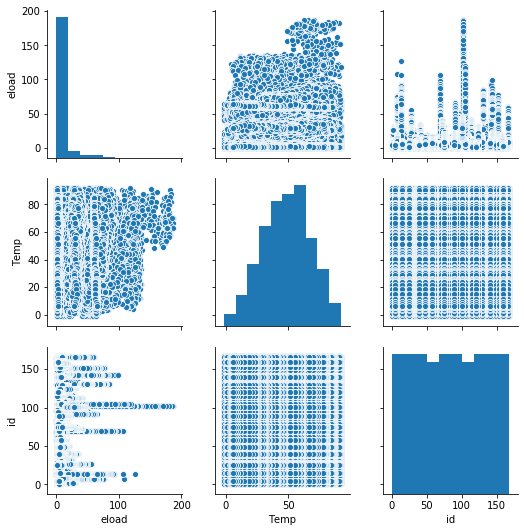

In [13]:
eda(fc)

In [14]:
total_ids = fc['id'].nunique() #Get total numbers of ids
indiv_ids_list = [] #Blank list 
for i in range(total_ids):
    indiv_id = fc.loc[fc['id'] == float(i)] #Store an individual id
    indiv_id = indiv_id.fillna(0)
    if(indiv_id.eload.mean() < 10.0):
        print(indiv_id.eload.mean())
        indiv_ids_list.append(indiv_id)
#Indiv_ids _lis
    


3.5278573721623476
3.0066446584135686
3.1813116689592094
3.1065032672245625
2.4274703117835705
3.1039723750573316
6.815194635488297
6.582570380559406
3.511616918844572
4.546784387895442
1.6829455524988555
5.107934319119676
2.4423066254011765
6.4928304676754145
3.1643732232920576
3.8105684970767055
1.478365657955063
2.216491861531402
0.8994868149507014
2.9490372578241484
4.6314395780784094
1.1886745012611852
4.704868867491998
8.570714121962409
4.8423778083448
1.7741965841357143
7.164053772070605
2.6483068546538395
6.769733035304915
3.6689667507452364
5.894136290692341
5.588697271893644
4.647486703347089
1.6596385417860857
3.0627919532324714
5.542009284731795
5.481022237505733
5.9409007336084425
2.9080766850068693
6.454825767996356
3.835797867461572
6.123426409903736
4.443847317744176
3.3530330123796426
3.8619048601558905
2.0777244383310367
4.946968835930357
2.693688904172394
6.446567645035561
1.98965386379271
5.338025103163704
1.8981646033929336
6.726118550791089
2.282842159559834
4.715

In [15]:
indiv_ids_list

[                    time  eload   Temp              Meterid  id
 0    2015-01-01 08:00:00  3.465   3.07  subDf_1007_2015.csv   0
 1    2015-01-01 09:00:00  3.566   8.18  subDf_1007_2015.csv   0
 2    2015-01-01 10:00:00  4.072  14.13  subDf_1007_2015.csv   0
 3    2015-01-01 11:00:00  3.830  18.85  subDf_1007_2015.csv   0
 4    2015-01-01 12:00:00  3.608  20.77  subDf_1007_2015.csv   0
 ...                  ...    ...    ...                  ...  ..
 8717 2015-12-31 19:00:00  4.421   9.07  subDf_1007_2015.csv   0
 8718 2015-12-31 20:00:00  4.347   8.90  subDf_1007_2015.csv   0
 8719 2015-12-31 21:00:00  5.411   7.25  subDf_1007_2015.csv   0
 8720 2015-12-31 22:00:00  4.712   7.37  subDf_1007_2015.csv   0
 8721 2015-12-31 23:00:00  4.862   6.09  subDf_1007_2015.csv   0
 
 [8722 rows x 5 columns],
                     time  eload   Temp              Meterid  id
 0    2015-01-01 08:00:00  0.840   3.07  subDf_1017_2015.csv   2
 1    2015-01-01 09:00:00  0.917   8.18  subDf_1017_2015.csv  

In [18]:
len(indiv_ids_list)

141